## Contents

- [Introduction](#introduction)
- [Data Loading](#data-loading)
- [Data Exploration](#data-exploration)
  - [Store Data](#store-data)
  - [Train Data](#train-data)
- [Data Cleaning](#data-cleaning)
  - [Handling Missing Values](#handling-missing-values)
  - [Removing Outliers](#removing-outliers)
- [Feature Engineering](#feature-engineering)
- [Data Merging](#data-merging)
- [Descriptive Statistics](#descriptive-statistics)
- [Data Visualization](#data-visualization)
  - [Sales and Customers Distributions](#sales-and-customers-distributions)
  - [Categorical Analysis](#categorical-analysis)
  - [Sales Trends](#sales-trends)
  - [Customer Trends](#customer-trends)
  - [SalesPerCustomer Trends](#salespercustomer-trends)
  - [Box Plots](#box-plots)
  - [Correlation Heatmap](#correlation-heatmap)
- [Conclusion](#conclusion)


In [1]:
# install libraries, packages, and warnings 
import warnings
warnings.filterwarnings("ignore")

# loading packages
# basic + dates 
import numpy as np
import pandas as pd
import datetime

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

# statistics
from statsmodels.distributions.empirical_distribution import ECDF
from scipy import stats
from scipy.stats import zscore

# time series analysis
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# prophet by Facebook
import prophet

In [2]:
train = pd.read_csv("C:/Users/ibsan/Desktop/TenX/week-4/Data/train.csv", 
                    parse_dates = True, low_memory = False, index_col = 'Date')

test = pd.read_csv("C:/Users/ibsan/Desktop/TenX/week-4/Data/test.csv", 
                    parse_dates = True, low_memory = False, index_col = 'Date')

# additional store data
store = pd.read_csv("C:/Users/ibsan/Desktop/TenX/week-4/Data/store.csv", 
                    low_memory = False)

In [3]:
# look at shape and preview store df 

print("In total: ", store.shape)
store.head(5)

In total:  (1115, 10)


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [4]:
# look at shape and preview train df

print("In total: ", train.shape)
train.head(5)

In total:  (1017209, 8)


,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
Date,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,1
2015-07-31,2,5,6064,625,1,1,0,1
2015-07-31,3,5,8314,821,1,1,0,1
2015-07-31,4,5,13995,1498,1,1,0,1
2015-07-31,5,5,4822,559,1,1,0,1


In [5]:
# preview the train index - contains dates 
train.index.T

DatetimeIndex(['2015-07-31', '2015-07-31', '2015-07-31', '2015-07-31',
               '2015-07-31', '2015-07-31', '2015-07-31', '2015-07-31',
               '2015-07-31', '2015-07-31',
               ...
               '2013-01-01', '2013-01-01', '2013-01-01', '2013-01-01',
               '2013-01-01', '2013-01-01', '2013-01-01', '2013-01-01',
               '2013-01-01', '2013-01-01'],
              dtype='datetime64[ns]', name='Date', length=1017209, freq=None)

In [6]:
# explore counts and dtypes of columns 
print(store.info())

print(' ')

print("Columns containing missing data:")
print(store.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB
None
 
Columns containing missing data:
Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance

In [7]:
# missing values in CompetitionDistance
store[pd.isnull(store.CompetitionDistance)]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
621,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
878,879,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"


In [8]:
# fill NaN with a median value (skewed distribuion)
store['CompetitionDistance'].fillna(store['CompetitionDistance'].median(), inplace = True)

In [9]:
# no promo = no information about the promo?
_ = store[pd.isnull(store.Promo2SinceWeek)]
_[_.Promo2 != 0].shape

(0, 10)

In [10]:
# replace NA's by 0
store.fillna(0, inplace = True)

print(store.isna().sum())

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64


In [11]:
# get descriptive statistics of columns 
store.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,1115.0,558.000000,322.017080,1.0,279.5,558.0,836.5,1115.0
CompetitionDistance,1115.0,5396.614350,7654.513635,20.0,720.0,2325.0,6875.0,75860.0
CompetitionOpenSinceMonth,1115.0,4.930942,4.284924,0.0,0.0,4.0,9.0,12.0
CompetitionOpenSinceYear,1115.0,1370.939013,935.467654,0.0,0.0,2006.0,2011.0,2015.0
Promo2,1115.0,0.512108,0.500078,0.0,0.0,1.0,1.0,1.0
Promo2SinceWeek,1115.0,12.083408,15.542241,0.0,0.0,1.0,22.0,50.0
Promo2SinceYear,1115.0,1030.239462,1006.038782,0.0,0.0,2009.0,2012.0,2015.0


In [12]:
# explore counts and dtypes of columns of the train dataset
print(train.info())

print(' ')

print("Columns containing missing data:")
print(train.isna().sum())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1017209 entries, 2015-07-31 to 2013-01-01
Data columns (total 8 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Sales          1017209 non-null  int64 
 3   Customers      1017209 non-null  int64 
 4   Open           1017209 non-null  int64 
 5   Promo          1017209 non-null  int64 
 6   StateHoliday   1017209 non-null  object
 7   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(1)
memory usage: 69.8+ MB
None
 
Columns containing missing data:
Store            0
DayOfWeek        0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64


In [13]:
# get descriptive statistics of columns 
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,1017209.0,558.429727,321.908651,1.0,280.0,558.0,838.0,1115.0
DayOfWeek,1017209.0,3.998341,1.997391,1.0,2.0,4.0,6.0,7.0
Sales,1017209.0,5773.818972,3849.926175,0.0,3727.0,5744.0,7856.0,41551.0
Customers,1017209.0,633.145946,464.411734,0.0,405.0,609.0,837.0,7388.0
Open,1017209.0,0.830107,0.375539,0.0,1.0,1.0,1.0,1.0
Promo,1017209.0,0.381515,0.485759,0.0,0.0,0.0,1.0,1.0
SchoolHoliday,1017209.0,0.178647,0.383056,0.0,0.0,0.0,0.0,1.0


In [14]:
print(f"Total number of stores: {train.Store.nunique()}")

Total number of stores: 1115


In [15]:
# outlier handling

# Calculate Z-scores for each column
z_scores = np.abs(zscore(train[['Sales', 'Customers']]))

# Set threshold for identifying outliers
threshold = 3

# Identify outliers
outliers = (z_scores > threshold)

# Remove outliers
train_no_outliers = train[~np.any(outliers, axis=1)]

In [16]:
print(f"Percent outliers: {len(train[np.any(outliers, axis=1)])/len(train) * 100}" )

Percent outliers: 1.7083018337431148


In [17]:
# data extraction
train_no_outliers['Year'] = train_no_outliers.index.year
train_no_outliers['Month'] = train_no_outliers.index.month
train_no_outliers['Day'] = train_no_outliers.index.day
train_no_outliers['WeekOfYear'] = train_no_outliers.index.to_series().dt.isocalendar().week

# adding new variable and dealing with divisions by 0 
train_no_outliers['SalePerCustomer'] = train_no_outliers['Sales']/(train_no_outliers['Customers'] + 1e-6)
train_no_outliers['SalePerCustomer'].describe()

count    999832.000000
mean          7.886304
std           4.102474
min           0.000000
25%           6.947468
50%           8.711690
75%          10.527670
max          64.957854
Name: SalePerCustomer, dtype: float64

In [18]:
# preview train df with new columns 
train_no_outliers.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear,SalePerCustomer
Date,,,,,,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,1,2015,7,31,31,9.482883
2015-07-31,2,5,6064,625,1,1,0,1,2015,7,31,31,9.702400
2015-07-31,3,5,8314,821,1,1,0,1,2015,7,31,31,10.126675
2015-07-31,4,5,13995,1498,1,1,0,1,2015,7,31,31,9.342457
2015-07-31,5,5,4822,559,1,1,0,1,2015,7,31,31,8.626118


In [19]:
# merge store and train dfs on Store 
store_train = pd.merge(train_no_outliers, store, on='Store')

In [20]:
store_train.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,...,SalePerCustomer,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,5263,555,1,1,0,1,2015,7,...,9.482883,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,5,6064,625,1,1,0,1,2015,7,...,9.702400,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,8314,821,1,1,0,1,2015,7,...,10.126675,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,13995,1498,1,1,0,1,2015,7,...,9.342457,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,5,4822,559,1,1,0,1,2015,7,...,8.626118,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0


In [21]:
store_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999832 entries, 0 to 999831
Data columns (total 22 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Store                      999832 non-null  int64  
 1   DayOfWeek                  999832 non-null  int64  
 2   Sales                      999832 non-null  int64  
 3   Customers                  999832 non-null  int64  
 4   Open                       999832 non-null  int64  
 5   Promo                      999832 non-null  int64  
 6   StateHoliday               999832 non-null  object 
 7   SchoolHoliday              999832 non-null  int64  
 8   Year                       999832 non-null  int32  
 9   Month                      999832 non-null  int32  
 10  Day                        999832 non-null  int32  
 11  WeekOfYear                 999832 non-null  UInt32 
 12  SalePerCustomer            999832 non-null  float64
 13  StoreType                  99

In [22]:
store_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,999832.0,557.728678,322.575644,1.0,279.0,557.0,839.0,1115.0
DayOfWeek,999832.0,4.010205,1.996258,1.0,2.0,4.0,6.0,7.0
Sales,999832.0,5572.068133,3515.592132,0.0,3677.0,5683.0,7722.0,17323.0
Customers,999832.0,600.661241,387.003673,0.0,399.0,603.0,822.0,2026.0
Open,999832.0,0.827154,0.378114,0.0,1.0,1.0,1.0,1.0
Promo,999832.0,0.378245,0.484949,0.0,0.0,0.0,1.0,1.0
SchoolHoliday,999832.0,0.178138,0.382629,0.0,0.0,0.0,0.0,1.0
Year,999832.0,2013.832536,0.777575,2013.0,2013.0,2014.0,2014.0,2015.0
Month,999832.0,5.836743,3.321975,1.0,3.0,6.0,8.0,12.0
Day,999832.0,15.707159,8.781473,1.0,8.0,16.0,23.0,31.0


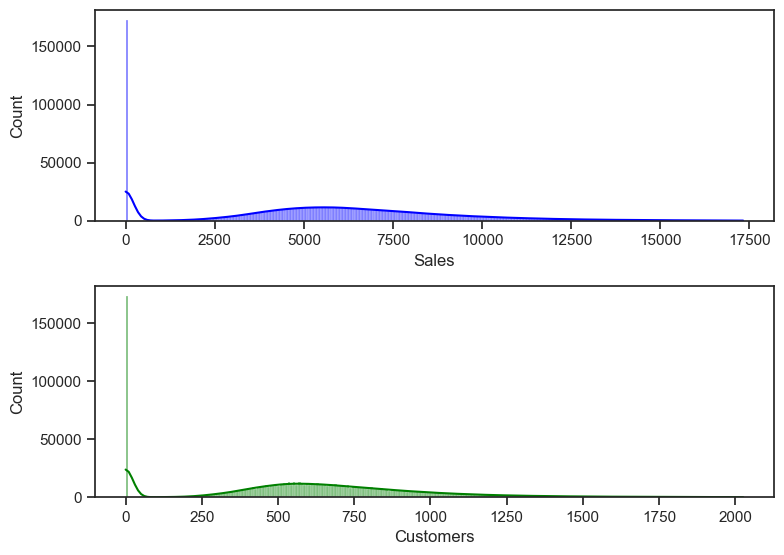

In [26]:
# Visualizing Sales and Customers distributions 

sns.set_theme(style = "ticks")# to format into seaborn 
c = '#386B7F' # basic color for plots
plt.figure(figsize = (8, 8))

plt.subplot(311)
sns.histplot(store_train['Sales'], kde=True, color='blue', label='Sales')

plt.subplot(312)
sns.histplot(store_train['Customers'], kde=True, color='green', label='Customers')

plt.tight_layout()

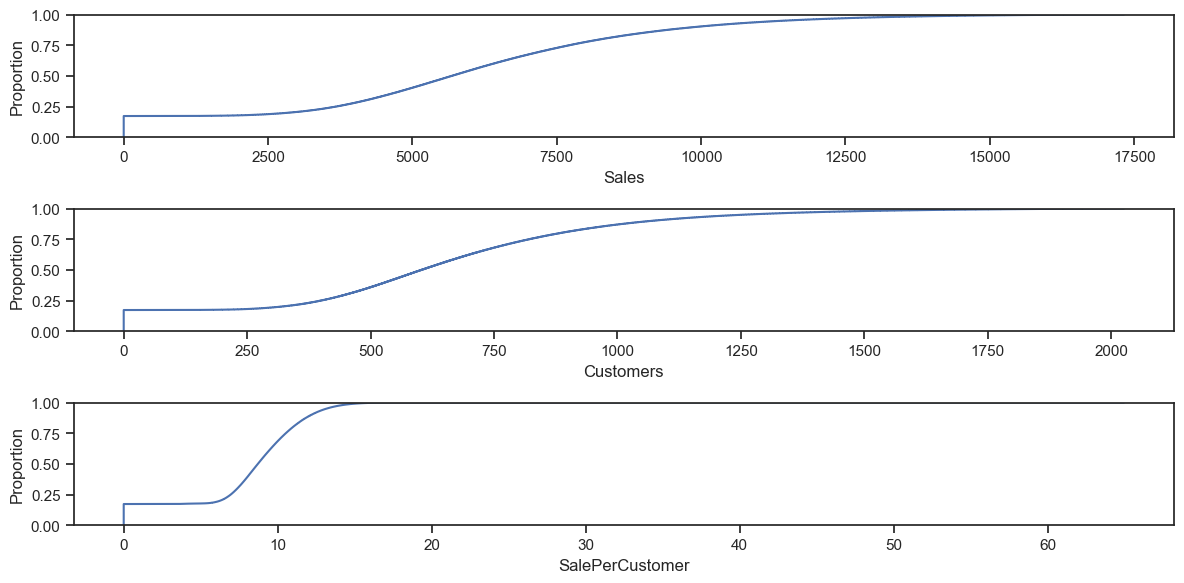

In [27]:
sns.set_theme(style = "ticks")# to format into seaborn 
c = '#386B7F' # basic color for plots
plt.figure(figsize = (12, 6))

plt.subplot(311)
sns.ecdfplot(data=store_train, x="Sales")

# plot second ECDF  
plt.subplot(312)
sns.ecdfplot(data=store_train, x="Customers")

# plot second ECDF  
plt.subplot(313)
sns.ecdfplot(data=store_train, x="SalePerCustomer")

plt.tight_layout()

In [28]:
# some are binary and nominal data, but for sake of keeping varaibles easy, all will fall under "cat"
# looking at only a select few for ease of analysis

cat_var = store_train[['Open', 'Promo','StateHoliday','SchoolHoliday', 'StoreType', 'Assortment']]

In [29]:
def categorical_analysis(df, cols, rows=3, hue=None, columns=2):
    """Labeled and color-coded visualizations of categorical (including binary) variables."""
    fig, axes = plt.subplots(rows, columns, figsize=(12, 8))
    axes = axes.flatten()

    for var, ax in zip(cols, axes):
        sns.countplot(x=var,
                      data=df,
                      ax=ax,
                      hue = hue,
                      order=df[var].value_counts().index,
                      palette="Paired")  # Optional: choose a color palette

        ax.tick_params()
        total = float(len(df[var]))
        ax.set_title(f'{str(var).capitalize()}')

        # Add percentages to the bars
        for p in ax.patches:
            height = p.get_height()
            ax.text(p.get_x() + p.get_width() / 2.,
                    height + 2,
                    '{:1.2f}%'.format((height / total) * 100),
                    ha='center')

    plt.tight_layout()

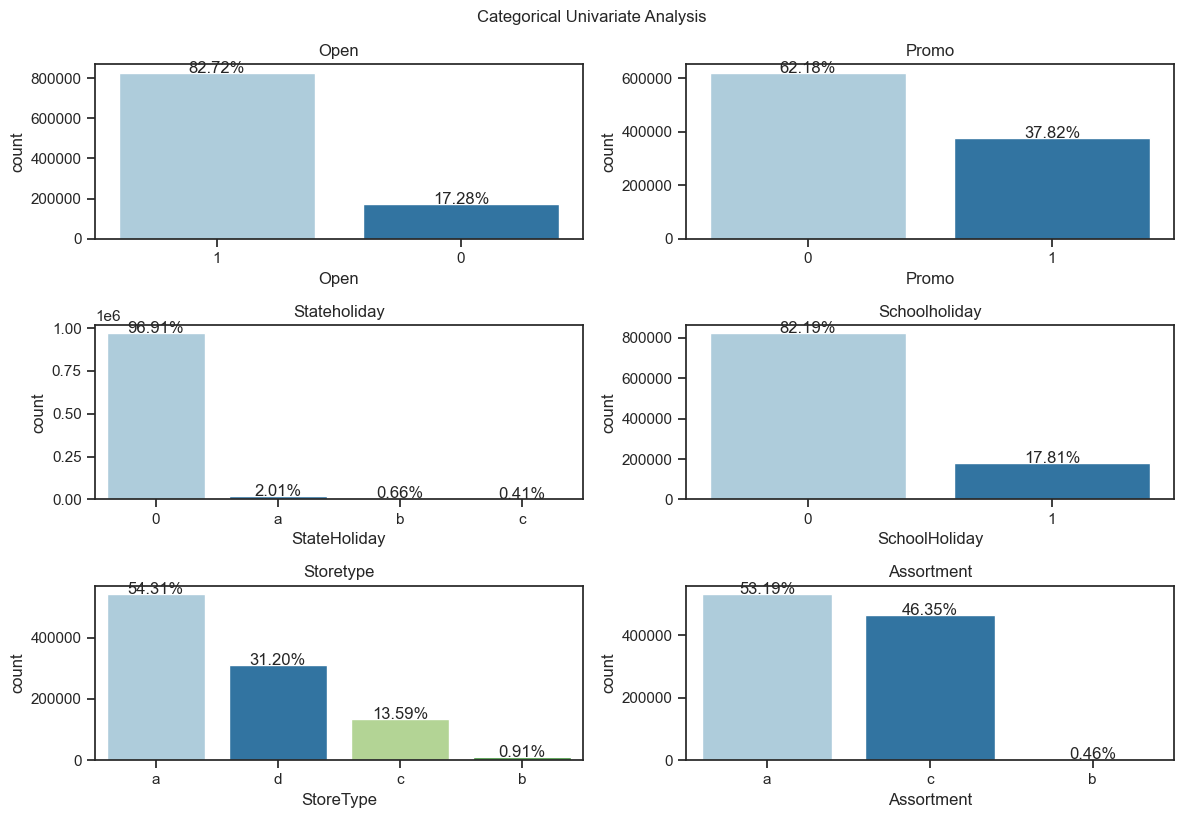

In [30]:
categorical_analysis(store_train, cat_var)
plt.suptitle("Categorical Univariate Analysis", fontsize = 12, y = 1.02)
plt.show()

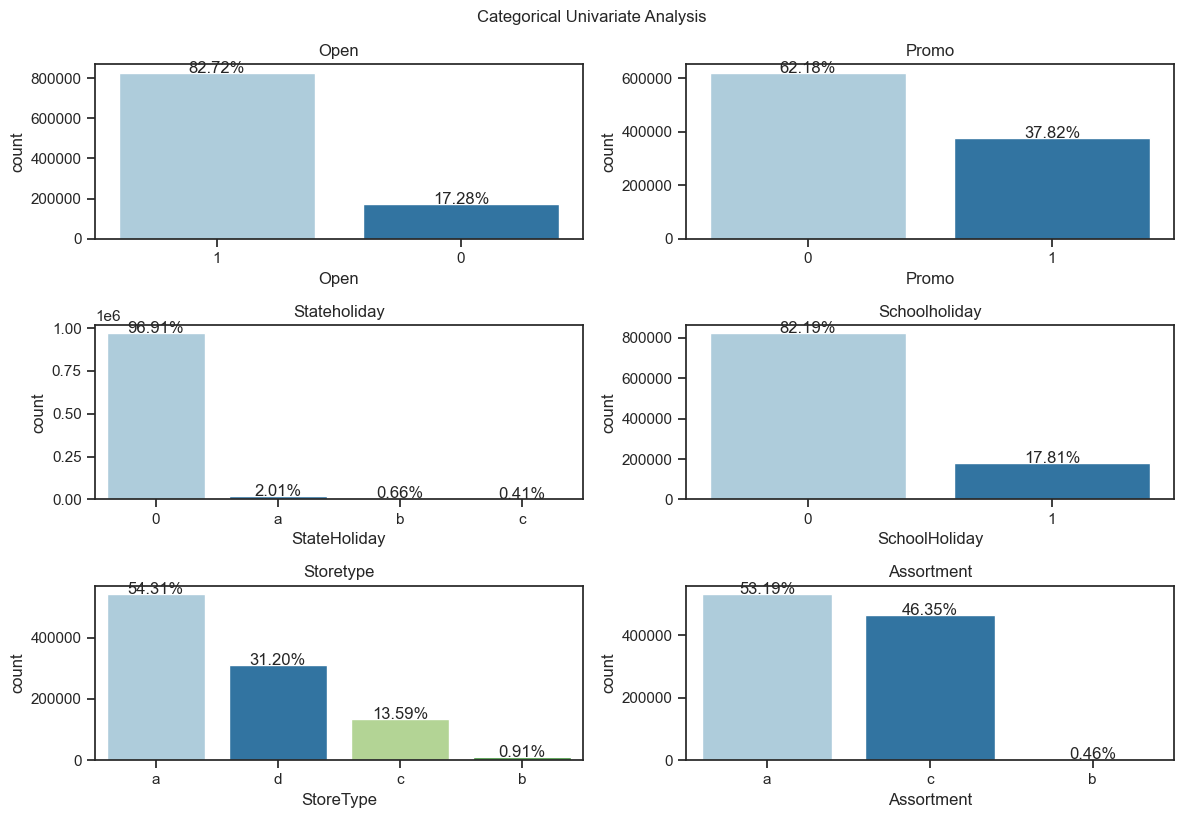

In [31]:
categorical_analysis(store_train, cat_var)
plt.suptitle("Categorical Univariate Analysis", fontsize = 12, y = 1.02)
plt.show()

In [32]:
# replace values with 1 
store_train['StateHoliday'] = store_train['StateHoliday'].replace('a', '1').replace('b', '1').replace('c', '1')

print(store_train.StateHoliday.value_counts())

StateHoliday
0    968981
1     30851
Name: count, dtype: int64


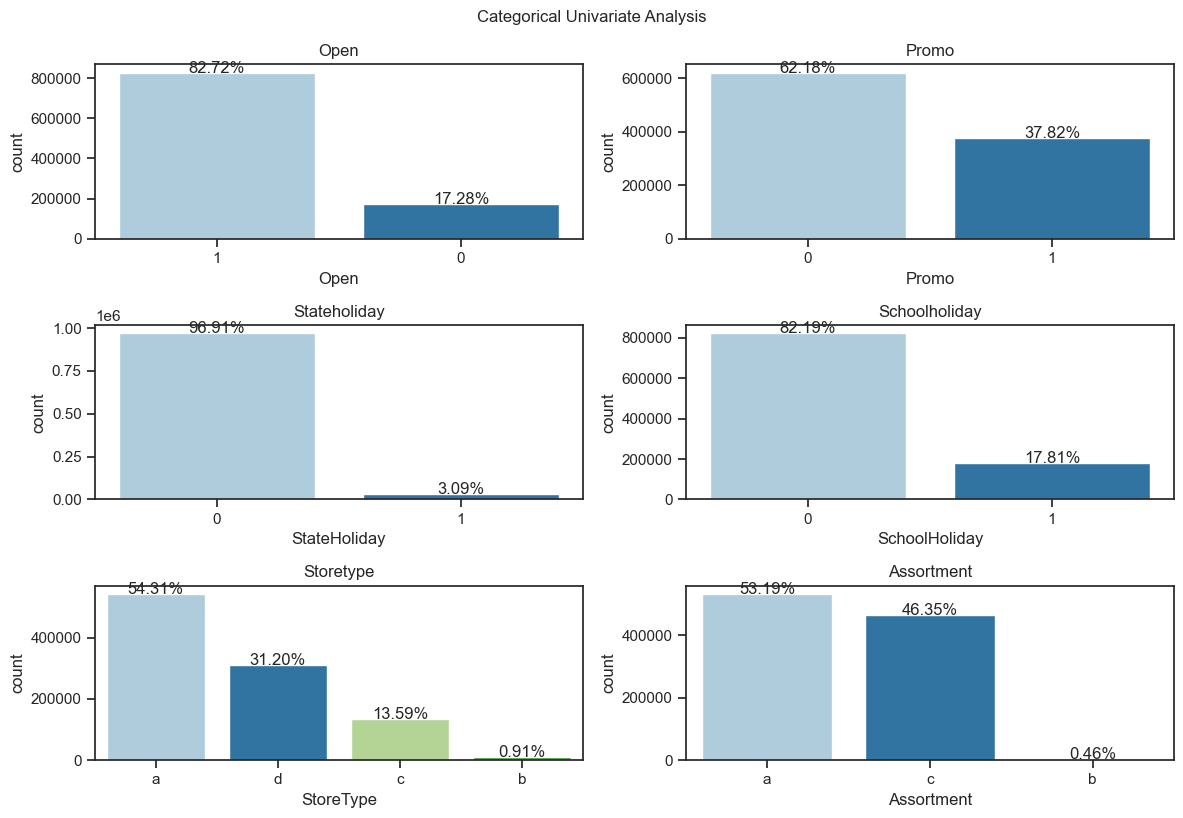

In [33]:
categorical_analysis(store_train, cat_var)
plt.suptitle("Categorical Univariate Analysis", fontsize = 12, y = 1.02)
plt.show()

Text(0.5, 1.01, 'Categorical Bivariate Analysis by Target (Severity)')

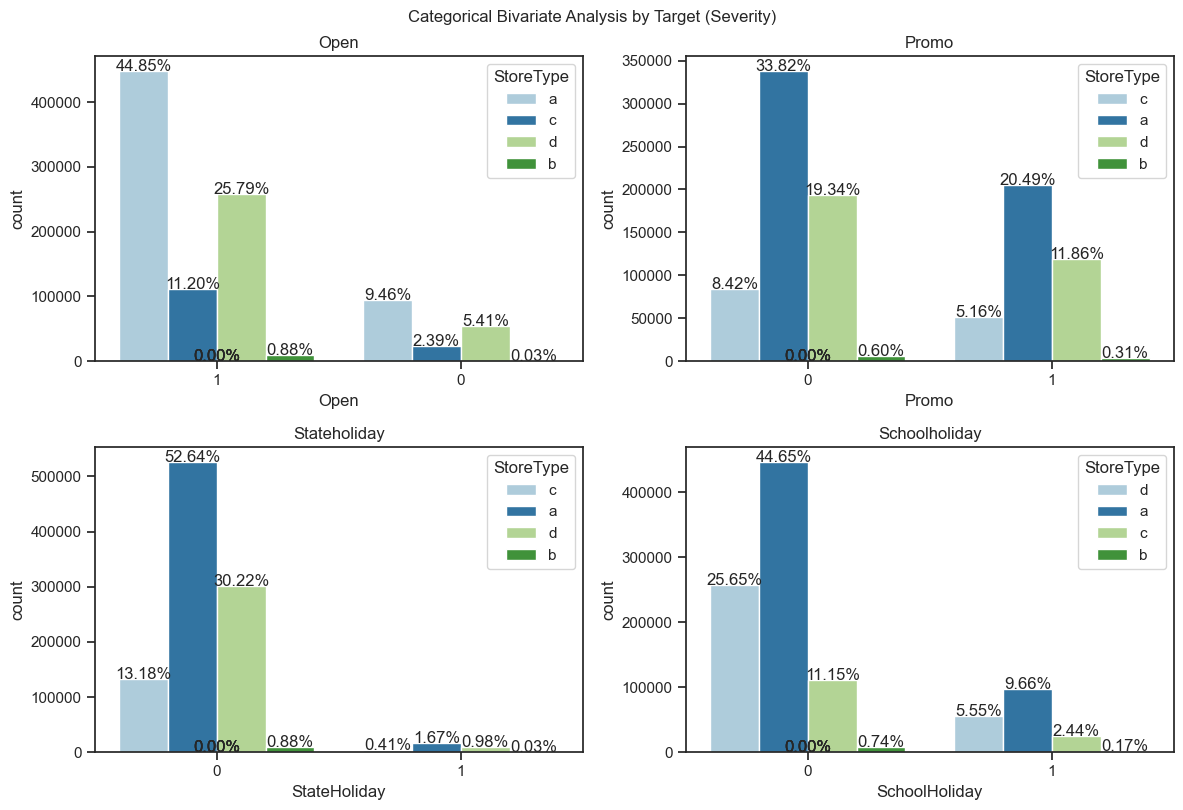

In [34]:
categorical_analysis(store_train, cat_var, hue = 'StoreType', rows = 2, columns =2)
plt.suptitle("Categorical Bivariate Analysis by Target (Severity)", fontsize = 12, y = 1.01)

In [35]:
# closed stores
store_train[(store_train.Open == 0) & (store_train.Sales == 0)].head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,...,SalePerCustomer,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
287,292,5,0,0,0,1,0,1,2015,7,...,0.0,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0
851,876,5,0,0,0,1,0,1,2015,7,...,0.0,a,a,21790.0,4.0,2005.0,1,18.0,2015.0,"Feb,May,Aug,Nov"
1374,292,4,0,0,0,1,0,1,2015,7,...,0.0,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0
1946,876,4,0,0,0,1,0,1,2015,7,...,0.0,a,a,21790.0,4.0,2005.0,1,18.0,2015.0,"Feb,May,Aug,Nov"
2470,292,3,0,0,0,1,0,1,2015,7,...,0.0,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0


In [36]:
print(f"Number of closed stores: {len(store_train[(store_train.Open == 0) & (store_train.Sales == 0)])}")

Number of closed stores: 172817


In [37]:
len(store_train[(store_train.Open == 0) & (store_train.Sales == 0)]) / (len(store_train)) * 100

17.284603813440658

In [38]:
# opened stores with zero sales
store_train[(store_train.Open != 0) & (store_train.Sales == 0)].head()

# see how many stores were open with zero sales 
(store_train[(store_train.Open != 0) & (store_train.Sales == 0)].head()).shape

(5, 22)

In [39]:
print("Closed stores and days which didn't have any sales won't be counted into the forecasts.")
store_train_clean = store_train[(store_train["Open"] != 0) & (store_train['Sales'] != 0)]

print("New data shape:", store_train_clean.shape)

Closed stores and days which didn't have any sales won't be counted into the forecasts.
New data shape: (826961, 22)


In [40]:
store_train_clean.groupby('StoreType')['Sales'].describe()

,count,mean,std,min,25%,50%,75%,max
StoreType,,,,,,,,
a,448384.0,6691.264084,2798.547767,46.0,4665.00,6220.0,8245.0,17322.0
b,8805.0,6905.741965,2405.436327,1252.0,5223.00,6645.0,8383.0,15386.0
c,111962.0,6823.348261,2655.896061,133.0,4902.25,6381.0,8283.0,17321.0
d,257810.0,6772.877293,2422.769269,538.0,5045.00,6384.0,8099.0,17323.0


In [41]:
store_train_clean.groupby('StoreType')[['Customers', 'Sales']].sum()

,Customers,Sales
StoreType,,
a,343095059,3000255755
b,11771149,60805058
c,90045472,763955718
d,155648642,1746115495


In [42]:
store_train_clean.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,...,SalePerCustomer,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,5263,555,1,1,0,1,2015,7,...,9.482883,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,5,6064,625,1,1,0,1,2015,7,...,9.702400,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,8314,821,1,1,0,1,2015,7,...,10.126675,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,13995,1498,1,1,0,1,2015,7,...,9.342457,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,5,4822,559,1,1,0,1,2015,7,...,8.626118,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0


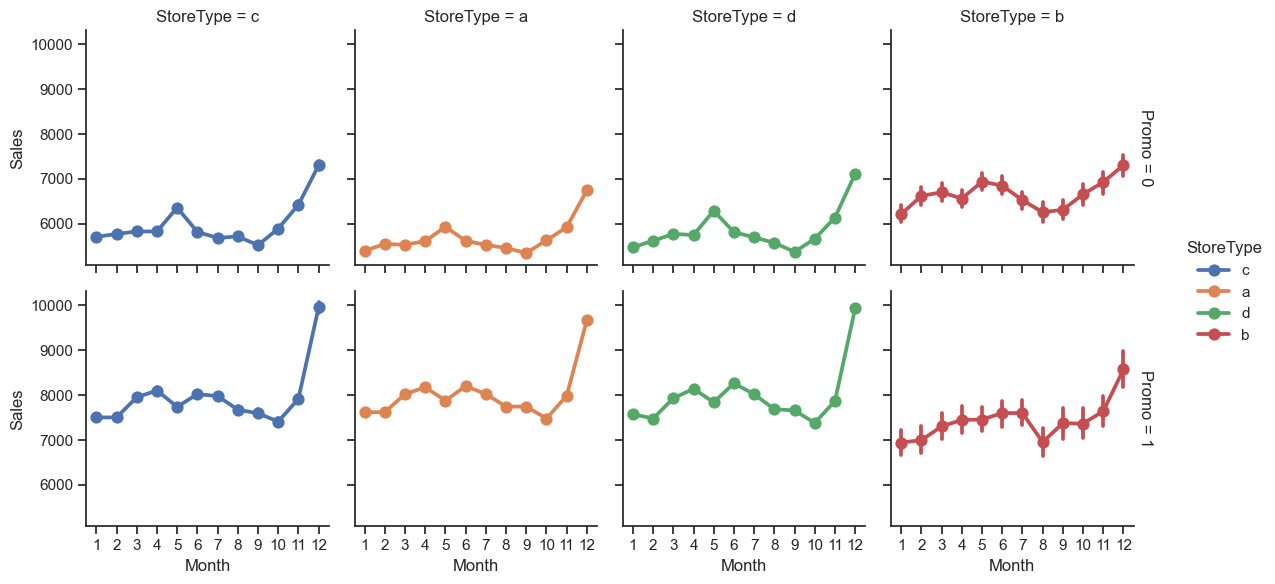

In [43]:
# sales trends
g = sns.FacetGrid(store_train_clean, col='StoreType', row='Promo', margin_titles=True, hue = 'StoreType')
g.map(sns.pointplot, 'Month', 'Sales', order=None)
g.add_legend()
plt.show()

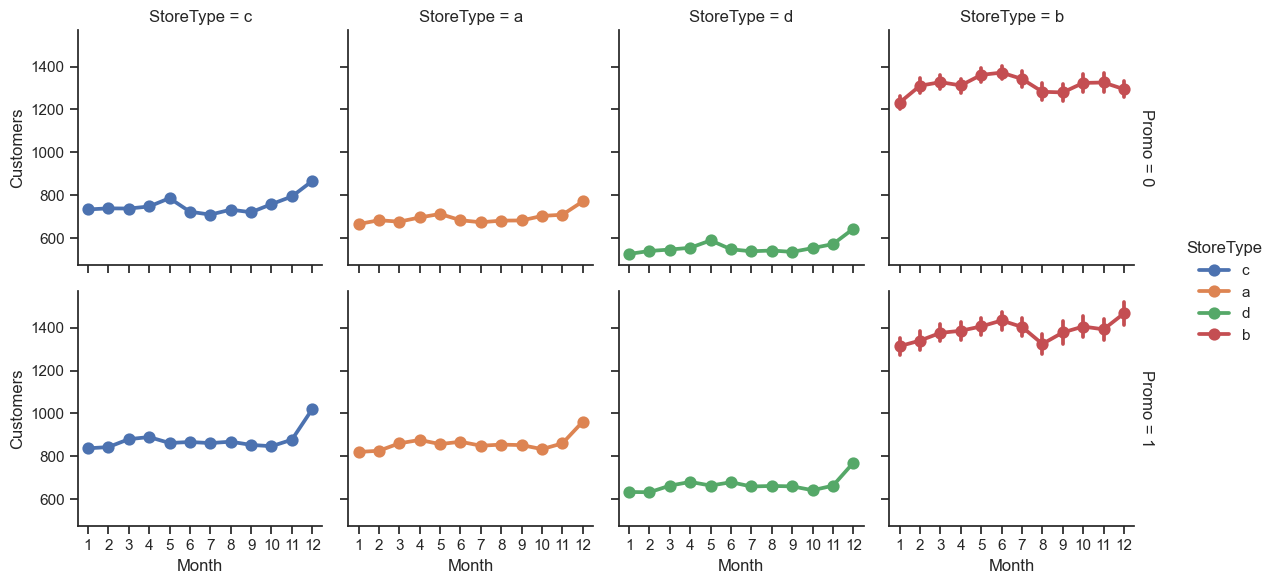

In [44]:
# Customer trends
g = sns.FacetGrid(store_train_clean, col='StoreType', row='Promo', margin_titles=True, hue = 'StoreType')
g.map(sns.pointplot, 'Month', 'Customers', order=None)
g.add_legend()
plt.show()

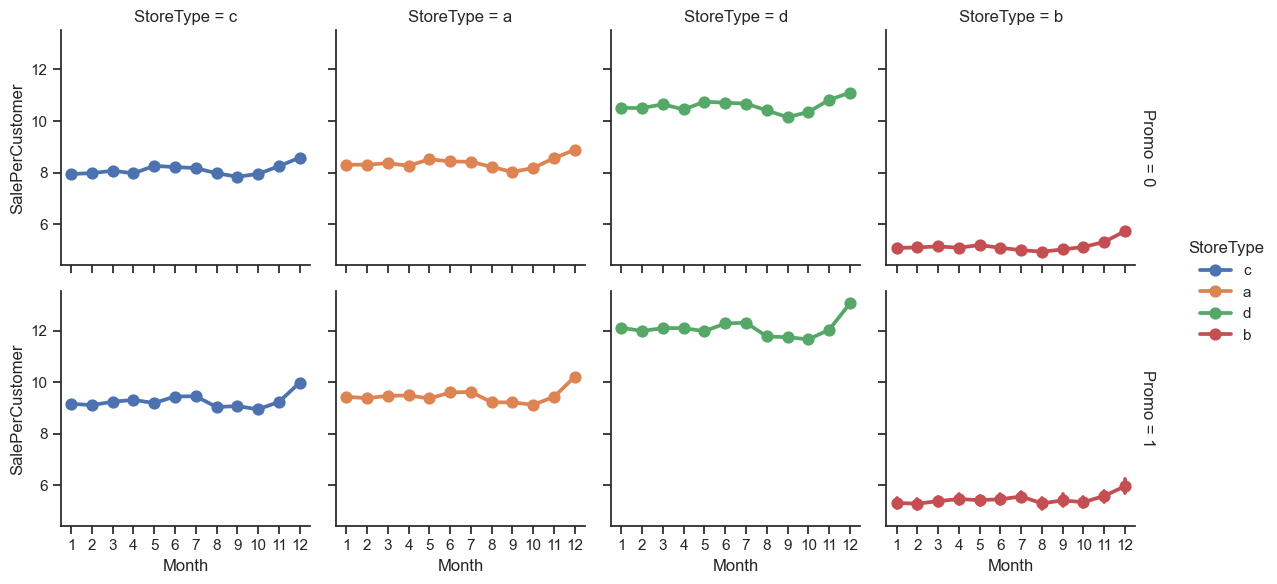

In [45]:
# SalesPerCustomer trends
g = sns.FacetGrid(store_train_clean, col='StoreType', row='Promo', margin_titles=True, hue = 'StoreType')
g.map(sns.pointplot, 'Month', 'SalePerCustomer', order=None)
g.add_legend()
plt.show()

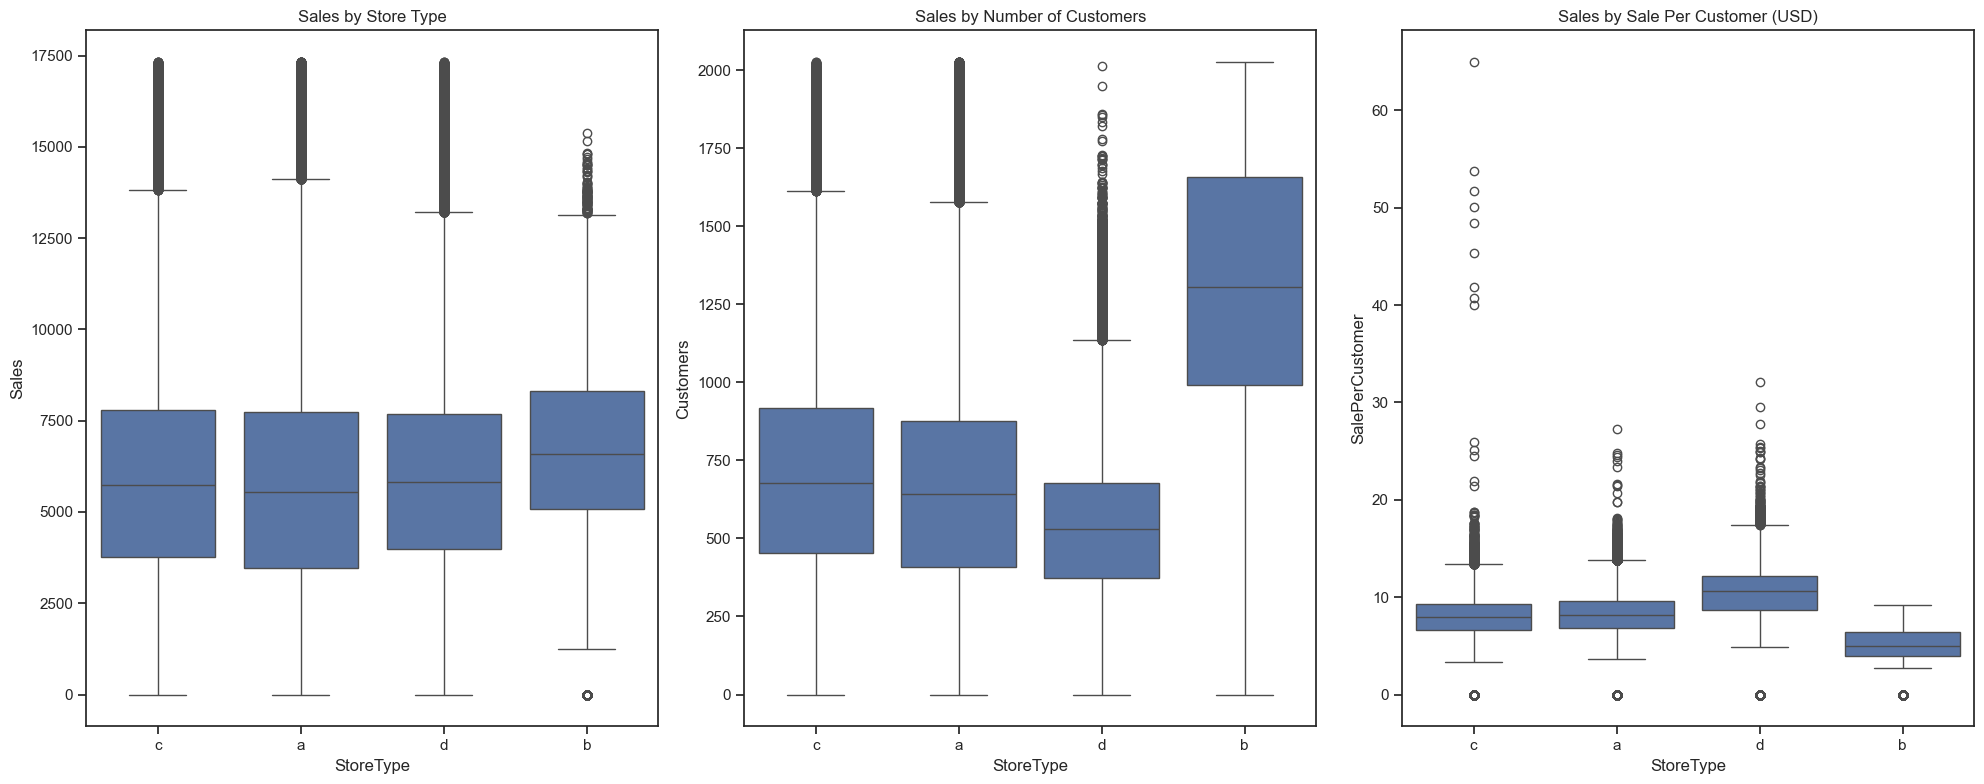

In [46]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20,8))

# Create the box plot
sns.boxplot(x="StoreType", y="Sales", data=store_train, ax = ax1)
ax1.set_title('Sales by Store Type')
sns.boxplot(x="StoreType", y="Customers", data=store_train, ax = ax2)
ax2.set_title('Sales by Number of Customers')
sns.boxplot(x="StoreType", y="SalePerCustomer", data=store_train, ax = ax3)
ax3.set_title('Sales by Sale Per Customer (USD)')

plt.tight_layout()
plt.show()

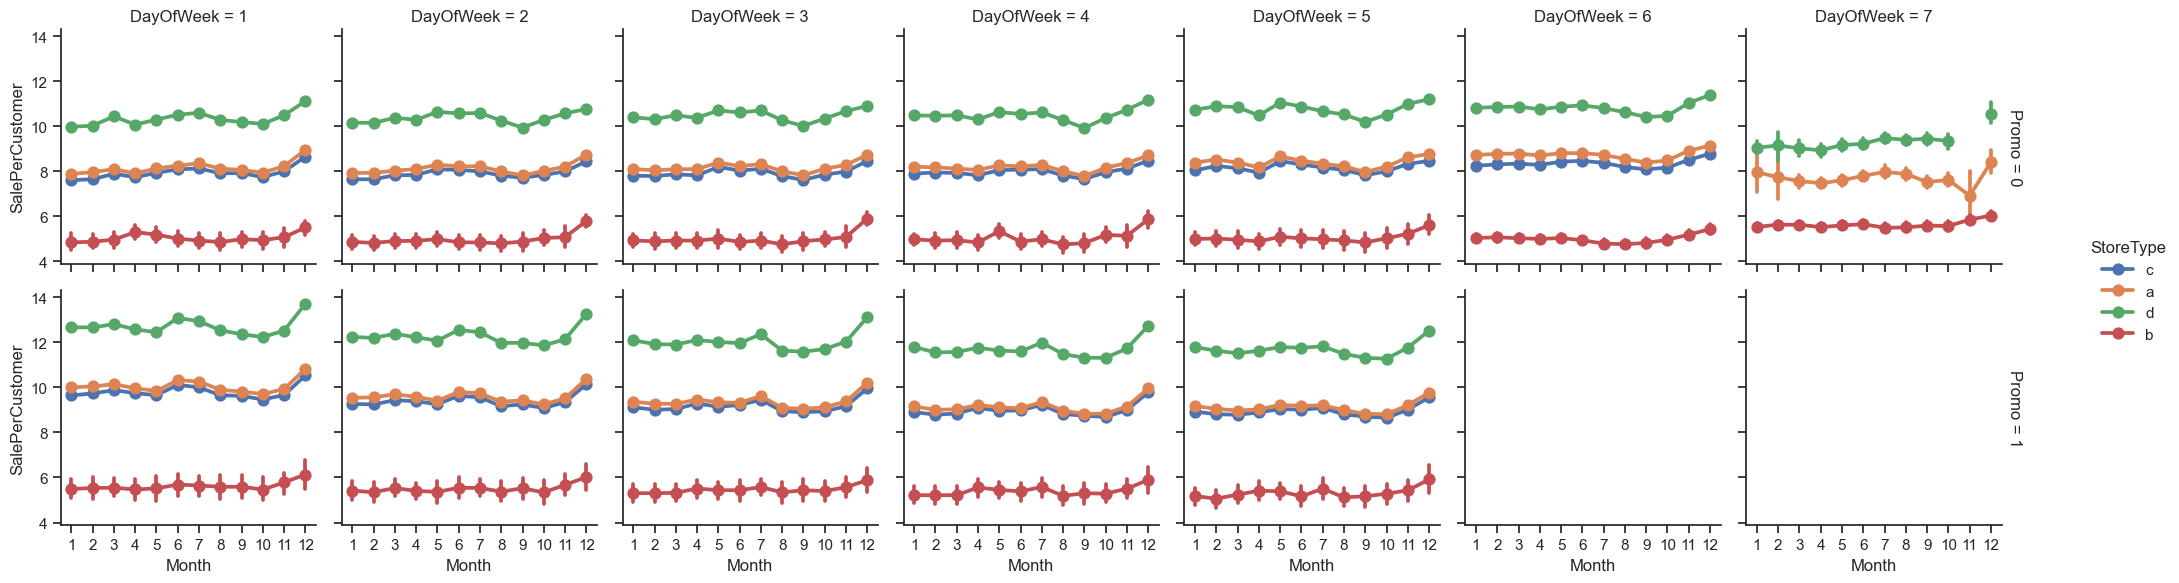

In [47]:
g = sns.FacetGrid(store_train_clean, col='DayOfWeek', row='Promo', margin_titles=True, hue = 'StoreType')
g.map(sns.pointplot, 'Month', 'SalePerCustomer', order=None)
g.add_legend()
plt.show()

In [48]:
store_train_clean['CompetitionOpen'] = 12 * (store_train_clean.Year - store_train_clean.CompetitionOpenSinceYear) + \
        (store_train_clean.Month - store_train_clean.CompetitionOpenSinceMonth)
    
# Promo open time
store_train_clean['PromoOpen'] = 12 * (store_train_clean.Year - store_train_clean.Promo2SinceYear) + \
        (store_train_clean.WeekOfYear - store_train_clean.Promo2SinceWeek) / 4.0


# replace NA's by 0
store_train_clean.fillna(0, inplace = True)

# average PromoOpen time and CompetitionOpen time per store type
store_train_clean.loc[:, ['StoreType', 'Sales', 'Customers', 'PromoOpen', 'CompetitionOpen']].groupby('StoreType').mean()

,Sales,Customers,PromoOpen,CompetitionOpen
StoreType,,,,
a,6691.264084,765.181316,12794.719623,7068.755056
b,6905.741965,1336.870982,16206.733617,10671.143782
c,6823.348261,804.250299,12069.902279,6800.970633
d,6772.877293,603.733920,10400.399075,9043.062647


In [49]:
store_train_clean = pd.DataFrame(store_train_clean)

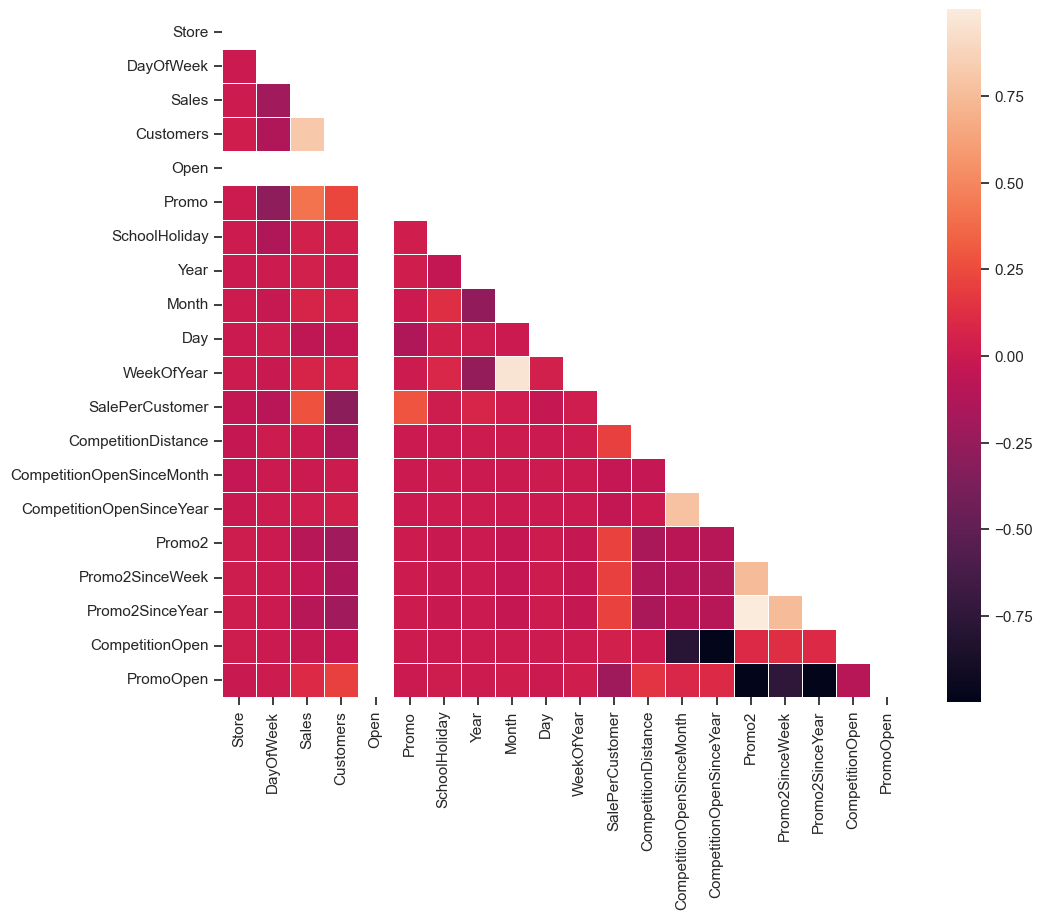

In [50]:
# Compute the correlation matrix 
# exclude 'Open' variable
corr_all = store_train_clean.corr(numeric_only = True)

# Generate a mask for the upper triangle
mask = np.zeros_like(corr_all)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize = (11, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_all, mask = mask,
            square = True, linewidths = .5, ax = ax, cmap = "rocket")      
plt.show()